<a href="https://colab.research.google.com/github/peshqa/MMO_lab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/ryanholbrook/binary-classification/data?select=hotel.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [81]:
from google.colab import files
uploaded = files.upload()

Saving hotel.csv to hotel.csv


In [82]:
df = pd.read_csv('hotel.csv')

In [83]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [99]:
df.shape

(119390, 32)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for t in ['arrival_date_month', 'hotel', 'deposit_type','customer_type', 'reservation_status']:
  df[t] = le.fit_transform(df[t])
df = df.fillna(0)
features = ['lead_time', 'arrival_date_year', 'adults', 'stays_in_week_nights', 'stays_in_weekend_nights', 'arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_month', 'hotel', 'deposit_type','customer_type', 'reservation_status']
X = df[features].copy()
X.head()

,lead_time,arrival_date_year,adults,stays_in_week_nights,stays_in_weekend_nights,arrival_date_day_of_month,arrival_date_week_number,arrival_date_month,hotel,deposit_type,customer_type,reservation_status
0,342,2015,2,0,0,1,27,5,1,0,2,1
1,737,2015,2,0,0,1,27,5,1,0,2,1
2,7,2015,1,1,0,1,27,5,1,0,2,1
3,13,2015,1,1,0,1,27,5,1,0,2,1
4,14,2015,2,2,0,1,27,5,1,0,2,1


In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, df['is_canceled'], test_size=0.25, random_state=13)

In [89]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=13, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=13)

In [90]:
clf.score(X_train, y_train)

0.9897478278349825

In [91]:
clf.predict(X_test[-1:])

array([1])

In [98]:
clf.coef_

array([[  0.54828604,  -0.13486684,  -1.22680745,   1.10951891,
          1.64384024,   0.12866573,  -0.32679248,  -0.17724734,
         -0.46569634,   3.45366099,  -0.40853609, -13.11241042]])

In [92]:
from sklearn.metrics import roc_curve

In [95]:
y_pred = clf.predict_proba(X_test)[:, 1]
y_pred.shape

(29848,)

In [94]:
y_test.shape

(29848,)

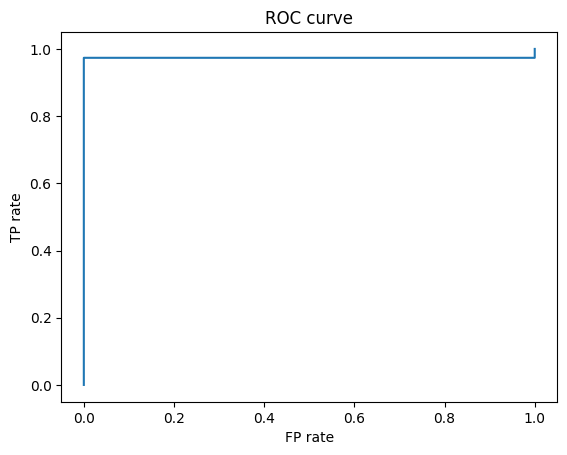

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('ROC curve')
plt.show()